In [1]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

---

#### <u>분류용 선형 모델</u>

`선형 모델`은 `분류(classification)`에도 많이 사용된다.

먼저 `이진 분류(binary classification)`에 관하여 살펴보자.<br> 해당 분류에서 예측을 위한 방정식은 다음과 같다.

> ŷ = w[0] × x[0] + w[1] × x[1] + … + w[p] × x[p] + b > 0

이 방정식은 `선형 회귀`와 매우 유사하다.<br>하지만 특성들의 가중치 합을 그냥 사용하는 대신 <u>예측한 값(`ŷ`)을 0과 비교한다.</u>

함수에서 계산한 값이 
- <u>0보다 작으면</u> 해당 객체의 클래스를 `-1`이라 예측하고
- <u>0보다 크면</u> `+1`이라고 예측한다.

즉, <u>계산한 값이 0보다 큰지 작은지를 판단하여 클래스를 예측한다는 의미이다.</u>

> `회귀용 선형 모델`에서는 `출력`이 선형 함수이지만,<br>
> `분류용 선형 모델`에서는 `결정 경계`가 선형 함수 이다.

`선형 분류 알고리즘`에서는 다음의 두 모델이 가장 널리 알려져 있다. <br>(둘다 분류 알고리즘이기에 LinearRegression과 같은 회귀 알고리즘과 혼동하지 말자)
- `로지스틱 회귀(Logistic Regression)`
- `선형 서포트 벡터 머신(Support Vector Machine : SVC)`

이제 forge 데이터셋을 사용하여<br> `LogisticRegression`과 `LinearSVC`를 만들고 이 선형 모델들이 만들어 낸 결정 경계를 살펴보자

C:\Users\jhryu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


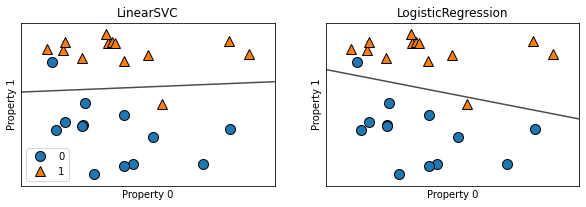

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=10000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Property 0")
    ax.set_ylabel("Property 1")
axes[0].legend()

위 그림에서 `forge` 데이터셋의 첫 번째 특성을 `x`축에 두 번째 특성을 `y`축에 배치하였다.<br> 두 모델로 만든 `결정 경계`가 <b>직선</b>으로 표현되었고 위쪽은 클래스 1, 아래쪽은 클래스 0로 나누고있다.<br>즉, 직선 위쪽에 놓이면 클래스 1, 아래쪽에 놓이면 클래스 0로 분류되는 것이다.

두 모델은 모두 비슷한 `결정 경계`와 `오류`를 보여준다.<br> 또한 두 모델은 모두 `Ridge`와 동일한 `L2 규제`를 사용한다. 

`LogisticRegression`과 `LinearSVC`에서 규제의 강도를 결정하는 매개변수는 `C`이다.<br>
회귀에서는 alpha와 반대로, `C`값이 커지면 규제는 오히려 감소한다. <br>규제가 완화되었다는 것은 원래 훈련 데이터에 덜 정확하도록 했던 것을 더욱 정확하게 맞춘다는 의미이다.

> - C 증가 => 규제 완화 => 훈련 세트에 가능한 맞추려고 한다. ( 데이터포인트를 정확히 분류하려 한다.)
> - C 감소 => 규제 강화 => 계수(`w`)가 0에 가까워진다

다음은 `LinearSVC`를 사용한 예이다.

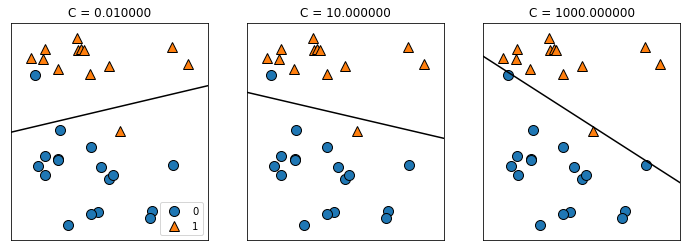

In [7]:
mglearn.plots.plot_linear_svc_regularization()

- (왼쪽) `C`가 매우 낮다 => 규제 강화

<br>

- (중간) `C`가 적당히 커짐 => 규제 적당히 완화
    - 잘못 분류된 데이터셋에 민감하게 반응하여 기울어짐

<br>

- (오른쪽) `C`가 매우 크다 => 규제 매우 완화
    - 결정 경계가 더 기울었고 마침내 클래스 0의 모든 데이터 포인트를 올바르게 분류하였다. 

`C`가 커질수록, 가중치(`w`)는 일반적인 선형 모델과 거의 같아지고, 정확도는 올라가지만 모델은 복잡해져서 일반화가 잘 이루어지지 않아 `과대적합`이 일어날 가능성이 생긴다. 반대로, `C`가 작아질수록, 가중치(`w`)는 0에 가깝게 수렴하게 되며, 정확도는 떨어지지만 덜 복잡하고, 더 일반화된 모델이 생성된다.

<u>회귀와 비슷하게, `분류`에서의 `선형모델`은 <b>낮은 차원의 데이터</b>에서는 `결정경계`가 직선이거나 평면이어서 매우 제한적인 것처럼 보인다. 하지만 <b>고차원</b>에서는 매우 강력해지고, 특성이 많아짐에 따라 `과대적합`되지 않도록 하는 것이 매우 중요하다.</u>

---

다음의 `유방암 데이터셋`을 사용해서 `LogisticRegression`에 관하여 살펴보자

In [30]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train)

print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


기본값 `C=1`이 `훈련 세트`와 `테스트 세트`에서 90%이상의 정확도로 꽤 휼륭한 성능을보인다.<br>하지만, 두 세트 모두 비슷한 성능을 보여주기 때문에 `과소적합`에 해당되는 것으로 추정된다.<br>모델의 제약을 풀어주기 위해 `C`값을 증가시켜보자

In [32]:
logreg100 = LogisticRegression(max_iter=10000, C=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg800.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg800.score(X_test, y_test)))

훈련 세트 점수: 0.986
테스트 세트 점수: 0.986


`C=100`을 사용하니 `훈련 세트`와 `테스트 세트`의 정확도가 모두 증가했다.

<br>

이번엔 규제를 더 강하게 하기 위해서 기본값이 아니라 `C=0.01`을 사용하면 어떻게 되는지 살펴보자

In [33]:
logreg001 = LogisticRegression(max_iter=10000, C=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


이미 과소적합된 모델에서 규제를 강화하였기 때문에 `훈련 세트`와 `테스트 세트`의 정확도는 `C=1`일 때 보다 낮아진다.

다음으로 규제 매개변수 C 설정을 세 가지로 다르게 하여 학습시킨 모델의 계수를 확인해보자

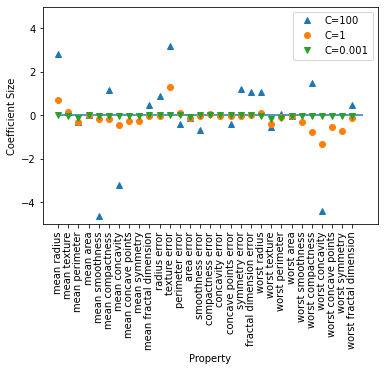

In [38]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Property")
plt.ylabel("Coefficient Size")
plt.legend()

`C`값이 커질수록 규제가 완화되어 계수(`w`)의 크기가 커지는 것을 확인할 수 있다.

---

### References

- 안드레아스 뮐러, 세라 가이도, 『파이썬 라이브러리를 활용한 머신러닝』, 박해선, 한빛미디어(2017)
- https://tensorflow.blog/%ed%8c%8c%ec%9d%b4%ec%8d%ac-%eb%a8%b8%ec%8b%a0%eb%9f%ac%eb%8b%9d/2-3-3-%ec%84%a0%ed%98%95-%eb%aa%a8%eb%8d%b8/
- https://kolikim.tistory.com/9